In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')
data.shape

(6000, 39)

In [3]:
X = data.drop('Grant.Status', 1)
y = data['Grant.Status']

In [4]:
numeric_cols = ['RFCD.Percentage.1', 'RFCD.Percentage.2', 'RFCD.Percentage.3', 
                'RFCD.Percentage.4', 'RFCD.Percentage.5',
                'SEO.Percentage.1', 'SEO.Percentage.2', 'SEO.Percentage.3',
                'SEO.Percentage.4', 'SEO.Percentage.5',
                'Year.of.Birth.1', 'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1']
categorical_cols = list(set(X.columns.values.tolist()) - set(numeric_cols))

In [5]:
print X.dropna().shape, y.dropna().shape

(213, 38) (6000,)


In [6]:
def calculate_means(numeric_data):
    means = np.zeros(numeric_data.shape[1])
    for j in range(numeric_data.shape[1]):
        to_sum = numeric_data.iloc[:,j]
        indices = np.nonzero(~numeric_data.iloc[:,j].isnull())[0]
        correction = np.amax(to_sum[indices])
        to_sum /= correction
        for i in indices:
            means[j] += to_sum[i]
        means[j] /= indices.size
        means[j] *= correction
    return pd.Series(means, numeric_data.columns)

In [7]:
X_real = X[numeric_cols] # get numeric cols
X_col_means = calculate_means(X_real) # get avg

In [8]:
X_real[pd.isnull(X_real).any(axis=1)].shape

(770, 13)

In [9]:
X_real_zeros = X_real.fillna(0) # fill na with 0
X_real_mean = X_real.fillna(value=X_col_means) # fill na with avg

In [10]:
X_real_zeros[pd.isnull(X_real_zeros).any(axis=1)].shape

(0, 13)

In [11]:
X_real_mean[pd.isnull(X_real_mean).any(axis=1)].shape

(0, 13)

In [12]:
X_col_means

RFCD.Percentage.1                   74.832348
RFCD.Percentage.2                   17.677593
RFCD.Percentage.3                    6.933011
RFCD.Percentage.4                    0.437937
RFCD.Percentage.5                    0.119112
SEO.Percentage.1                    71.483240
SEO.Percentage.2                    20.646880
SEO.Percentage.3                     6.926704
SEO.Percentage.4                     0.730804
SEO.Percentage.5                     0.212192
Year.of.Birth.1                   1962.449849
Number.of.Successful.Grant.1         1.177849
Number.of.Unsuccessful.Grant.1       2.097977
dtype: float64

In [13]:
sum(X_real_mean['RFCD.Percentage.1'] == X_col_means['RFCD.Percentage.1'])

417

In [47]:
#X_cat = X[categorical_cols]
X_cat = X[categorical_cols].fillna('NA', inplace=False).astype(str)

In [49]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 25 columns):
Country.of.Birth.1                        6000 non-null object
SEO.Code.4                                6000 non-null object
SEO.Code.5                                6000 non-null object
B.1                                       6000 non-null object
SEO.Code.1                                6000 non-null object
SEO.Code.2                                6000 non-null object
SEO.Code.3                                6000 non-null object
C.1                                       6000 non-null object
No..of.Years.in.Uni.at.Time.of.Grant.1    6000 non-null object
With.PHD.1                                6000 non-null object
Sponsor.Code                              6000 non-null object
RFCD.Code.5                               6000 non-null object
RFCD.Code.4                               6000 non-null object
RFCD.Code.3                               6000 non-null object
RFCD.Code.2

In [50]:
X_cat = X_cat.fillna('NA')
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 25 columns):
Country.of.Birth.1                        6000 non-null object
SEO.Code.4                                6000 non-null object
SEO.Code.5                                6000 non-null object
B.1                                       6000 non-null object
SEO.Code.1                                6000 non-null object
SEO.Code.2                                6000 non-null object
SEO.Code.3                                6000 non-null object
C.1                                       6000 non-null object
No..of.Years.in.Uni.at.Time.of.Grant.1    6000 non-null object
With.PHD.1                                6000 non-null object
Sponsor.Code                              6000 non-null object
RFCD.Code.5                               6000 non-null object
RFCD.Code.4                               6000 non-null object
RFCD.Code.3                               6000 non-null object
RFCD.Code.2

In [51]:
sum(X_cat['Home.Language.1'] == 'NA')

5444

In [52]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_extraction import DictVectorizer as DV


In [53]:
encoder = DV(sparse = False)

#X_cat_oh = encoder.fit_transform(X_cat.T.to_dict().values())
X_cat_oh = encoder.fit_transform(X_cat.T.to_dict().values())


In [54]:
X_cat = X[categorical_cols].fillna('NA', inplace=False).astype(str)

In [55]:
X_cat_oh2=  encoder.transform(X_cat.T.to_dict().values())

In [56]:
X_cat_oh[300:310]

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  1.]])

In [57]:
X_cat_oh2[300:310]

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  1.]])

In [28]:
from sklearn.cross_validation import train_test_split

(X_train_real_zeros, 
 X_test_real_zeros, 
 y_train, y_test) = train_test_split(X_real_zeros, y, 
                                     test_size=0.3, 
                                     random_state=0)
(X_train_real_mean, 
 X_test_real_mean) = train_test_split(X_real_mean, 
                                      test_size=0.3, 
                                      random_state=0)
(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(X_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0)

/home/sigor/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
print X_train_real_zeros.shape, X_test_real_zeros.shape, y.shape, y_train.shape, y_test.shape

(4200, 13) (1800, 13) (6000,) (4200,) (1800,)


In [30]:
print X_train_real_mean.shape, X_test_real_mean.shape

(4200, 13) (1800, 13)


In [31]:
print X_train_cat_oh.shape, X_test_cat_oh.shape

(4200, 351) (1800, 351)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score

def plot_scores(optimizer):
    scores = [[item[0]['C'], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()
    
def write_answer_1(auc_1, auc_2):
    auc = (auc_1 + auc_2)/2
    with open("preprocessing_lr_answer1.txt", "w") as fout:
        fout.write(str(auc))
        
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cv = 3


/home/sigor/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [45]:
a = np.array([[1, 2, 3], [10, 20, 10]])
b = np.array([[2, 3, 4], [20, 30, 40]])
print np.vstack((a,b))
print np.hstack((a, b))

[[ 1  2  3]
 [10 20 10]
 [ 2  3  4]
 [20 30 40]]
[[ 1  2  3  2  3  4]
 [10 20 10 20 30 40]]


In [76]:
X_tr_0 = np.hstack((X_train_real_zeros, X_train_cat_oh))
X_ts_0 = np.hstack((X_test_real_zeros, X_test_cat_oh))
print X_tr_0.shape, X_ts_0.shape

(4200, 364) (1800, 364)


In [77]:
X_tr_avg = np.hstack((X_train_real_mean, X_train_cat_oh))
X_ts_avg = np.hstack((X_test_real_mean, X_test_cat_oh))
print X_tr_avg.shape, X_ts_avg.shape

(4200, 364) (1800, 364)


In [103]:
optimizer_0 = GridSearchCV(LogisticRegression(), param_grid, cv = cv, n_jobs=-1)
optimizer_0.fit(X_tr_0, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [104]:
optimizer_avg = GridSearchCV(LogisticRegression(), param_grid, cv = cv, n_jobs=-1)
optimizer_avg.fit(X_tr_avg, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

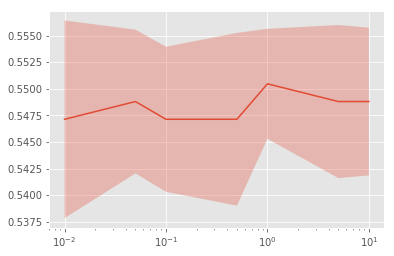

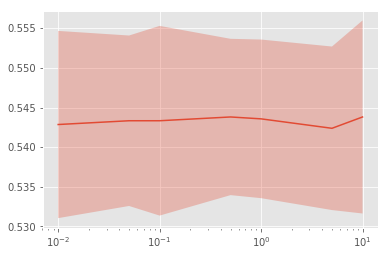

In [105]:
plot_scores(optimizer_0)
plot_scores(optimizer_avg)

In [106]:
auc_0 = roc_auc_score(y_test, optimizer_0.predict_proba(X_ts_0)[:,1])

In [107]:
auc_avg = roc_auc_score(y_test, optimizer_avg.predict_proba(X_ts_avg)[:,1])

In [108]:
print auc_0, auc_avg

0.564136528941 0.556783942605


In [109]:
write_answer_1(auc_avg, auc_0)